In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
api_key = 'RGAPI-d6e216f1-1990-4e99-8518-fda8a6288ba8'

In [2]:
df = pd.read_csv('GrandMaster_Player_Info.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
# df2 = pd.DataFrame(columns=['Lane', 'GameID', 'Champion'])

In [4]:
df2 = pd.read_csv('MatchID_Data.csv')

In [5]:
df2 = df2.drop(columns='Unnamed: 0')

In [5]:
all_matches = []

In [62]:
api_key = 'RGAPI-95e9ef81-91da-4bff-84ab-ec17442a2e1e'
counter = 0
lanes = []
gameids = []
champions = []
for accounts in df['Account_ID']:
    url = 'https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/' + accounts +'?endIndex=5&api_key=' + api_key
    response = requests.get(url)
    for num in range(0,5):
        try:
            lanes.append(response.json()['matches'][num]['lane'])
            gameids.append(response.json()['matches'][num]['gameId'])
            champions.append(response.json()['matches'][num]['champion'])
        except:
            pass
    counter +=1
    if counter == 100:
        print('reached limit - time to sleep')
        time.sleep(120)
        counter = 0
    
    
    
    
    

reached limit - time to sleep
reached limit - time to sleep
reached limit - time to sleep
reached limit - time to sleep
reached limit - time to sleep
reached limit - time to sleep
reached limit - time to sleep


In [66]:
df2['Lane'] = lanes
df2['Champion'] = champions
df2['GameID'] = gameids

In [68]:
df2.to_csv('MatchID_Data.csv')

In [6]:
Mid_lane_games = df2[df2['Lane'] == 'MID']

In [7]:
Mid_lane_games

Lane      GameID  Champion
0     MID  3015928183       142
1     MID  3015886743       142
3     MID  3015846686        38
6     MID  3015739551        45
7     MID  3015750507        82
9     MID  3015646628        45
15    MID  3011346967        40
31    MID  3015669152       131
42    MID  3015583391        10
43    MID  3015563974       105
45    MID  3015733590         7
46    MID  3015729263         7
55    MID  3015638450         4
65    MID  3012689576       126
66    MID  3012594118       126
67    MID  3012583046       126
68    MID  3012540873       126
82    MID  3013714068        26
84    MID  3010019622       245
95    MID  3011254514       157
97    MID  3011177447        84
98    MID  3011143318        84
99    MID  3011112704       157
113   MID  3015793209        12
122   MID  3015349904       421
123   MID  3015322309        50
130   MID  3015974872        32
131   MID  3015957423        16
135   MID  3014232957        39
136   MID  3012511787        39
...   ...         ...       ...
3260  MID  3016011101        74
3262  MID  3015846686        74
3264  MID  3015752499        74
3265  MID  3015056031        41
3271  MID  3015901250        74
3272  MID  3015876122        74
3273  MID  3015852286        74
3274  MID  3015826289        74
3321  MID  3015197604        59
3335  MID  3015323917       238
3358  MID  3015806029       238
3359  MID  3015813869       238
3368  MID  3011600342       432
3395  MID  3015957427        25
3403  MID  3015426638        22
3405  MID  3015784725        39
3440  MID  3013753864        10
3442  MID  3013732811       163
3443  MID  3013707907        10
3444  MID  3012411062         7
3451  MID  3015729546        38
3453  MID  3015678270       238
3460  MID  3014270362       238
3461  MID  3013833341       238
3464  MID  3013705575       238
3467  MID  3015143844        39
3469  MID  3015106357         7
3491  MID  3015634014       517
3492  MID  3015584998         8
3493  MID  3015423315         8

[610 rows x 3 columns]

In [8]:
most_played_champs = Mid_lane_games.groupby('Champion').count().sort_values('Lane', ascending = False)

In [9]:
most_played_champs.head()

Lane  GameID
Champion              
238         49      49
7           22      22
142         21      21
157         19      19
84          18      18

In [20]:
print(Mid_lane_games[Mid_lane_games.index == 1454])
print(Mid_lane_games[Mid_lane_games.index == 1931])
print(Mid_lane_games[Mid_lane_games.index == 140])
print(Mid_lane_games[Mid_lane_games.index == 95])
print(Mid_lane_games[Mid_lane_games.index == 3055])

     Lane      GameID  Champion
1454  MID  3015679871       157
     Lane      GameID  Champion
1931  MID  3014105707       157
    Lane      GameID  Champion
140  MID  3015254721       157
   Lane      GameID  Champion
95  MID  3011254514       157
     Lane      GameID  Champion
3055  MID  3015639227       157


In [19]:
Mid_lane_games[Mid_lane_games['Champion'] == 157]

Lane      GameID  Champion
95    MID  3011254514       157
99    MID  3011112704       157
140   MID  3015254721       157
266   MID  3015586879       157
445   MID  3014306452       157
447   MID  3012463079       157
674   MID  3015707505       157
1057  MID  3015922311       157
1454  MID  3015679871       157
1505  MID  3015144516       157
1509  MID  3015122622       157
1930  MID  3014108785       157
1931  MID  3014105707       157
1932  MID  3014101439       157
1934  MID  3014049643       157
1990  MID  3014400474       157
1991  MID  3014328153       157
2495  MID  3015889734       157
3055  MID  3015639227       157

In [26]:
games = ['3015679871', '3014105707', '3015254721', '3011254514', '3015639227']

In [22]:
# game1 = []
# game2 = []
# game3 = []
# game4 = []
game5 = []
# mygame = []

In [24]:
url = 'https://na1.api.riotgames.com/lol/match/v4/timelines/by-match/3015639227?api_key=' + api_key
response = requests.get(url)
game5.append(response.json())

In [12]:
mygame[0]#should make a graph showing xp/gold over the frame counter like below.

{'frames': [{'participantFrames': {'1': {'participantId': 1,
     'position': {'x': 351, 'y': 293},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '2': {'participantId': 2,
     'position': {'x': 560, 'y': 361},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '3': {'participantId': 3,
     'position': {'x': 221, 'y': 471},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'dominionScore': 0,
     'teamScore': 0},
    '4': {'participantId': 4,
     'position': {'x': 311, 'y': 649},
     'currentGold': 500,
     'totalGold': 500,
     'level': 1,
     'xp': 0,
     'minionsKilled': 0,
     'jungleMinionsKilled': 0,
     'domini

In [20]:
#My Game
mgplayer1_x = []
mgplayer1_y = []
mgplayer2_x = []
mgplayer2_y = []
mgplayer3_x = []
mgplayer3_y = []
mgplayer4_x = []
mgplayer4_y = []
mgplayer5_x = []
mgplayer5_y = []
mgplayer10_x = []
mgplayer10_y = []

for counter in range(len(mygame[0]['frames'])-1):
    mgplayer10_x.append(mygame[0]['frames'][counter]['participantFrames']['10']['position']['x'])
    mgplayer10_y.append(mygame[0]['frames'][counter]['participantFrames']['10']['position']['y'])
    mgplayer1_x.append(mygame[0]['frames'][counter]['participantFrames']['1']['position']['x'])
    mgplayer1_y.append(mygame[0]['frames'][counter]['participantFrames']['1']['position']['y'])
    mgplayer2_x.append(mygame[0]['frames'][counter]['participantFrames']['2']['position']['x'])
    mgplayer2_y.append(mygame[0]['frames'][counter]['participantFrames']['2']['position']['y'])
    mgplayer3_x.append(mygame[0]['frames'][counter]['participantFrames']['3']['position']['x'])
    mgplayer3_y.append(mygame[0]['frames'][counter]['participantFrames']['3']['position']['y'])
    mgplayer4_x.append(mygame[0]['frames'][counter]['participantFrames']['4']['position']['x'])
    mgplayer4_y.append(mygame[0]['frames'][counter]['participantFrames']['4']['position']['y'])
    mgplayer5_x.append(mygame[0]['frames'][counter]['participantFrames']['5']['position']['x'])
    mgplayer5_y.append(mygame[0]['frames'][counter]['participantFrames']['5']['position']['y'])
    
    
    
    
    

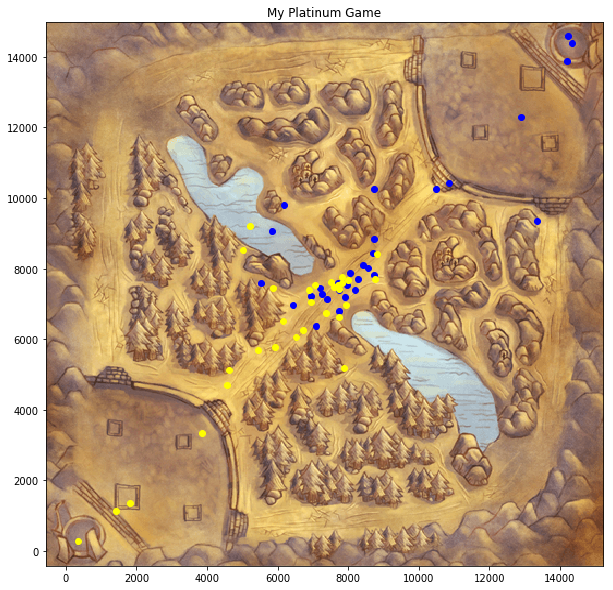

In [16]:
#my game plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(mgplayer10_x, mgplayer10_y, color = 'blue')
ax.set_title('My Platinum Game')
ax.scatter(mgplayer1_x,mgplayer1_y, color ='yellow')

In [224]:
#Game 1
g1player4_x = []
g1player4_y = []
g1player10_x = []
g1player10_y = []
for counter in range(len(game1[0]['frames'])-1):
    g1player10_x.append(game1[0]['frames'][counter]['participantFrames']['10']['position']['x'])
    g1player10_y.append(game1[0]['frames'][counter]['participantFrames']['10']['position']['y'])
    g1player4_x.append(game1[0]['frames'][counter]['participantFrames']['4']['position']['x'])
    g1player4_y.append(game1[0]['frames'][counter]['participantFrames']['4']['position']['y'])

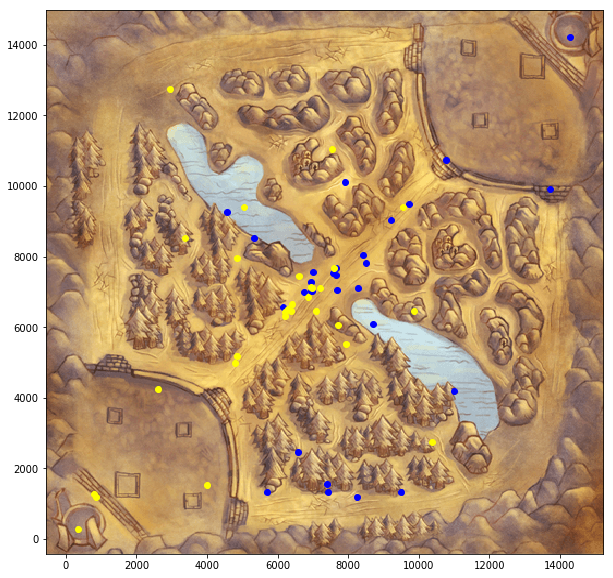

In [225]:
#game 1 plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(g1player10_x, g1player10_y, color = 'blue')
ax.scatter(g1player4_x,g1player4_y, color ='yellow')

In [211]:
#Game 2
g2player1_x = []
g2player1_y = []
g2player8_x = []
g2player8_y = []
for counter in range(len(game2[0]['frames'])-1):
    g2player8_x.append(game2[0]['frames'][counter]['participantFrames']['8']['position']['x'])
    g2player8_y.append(game2[0]['frames'][counter]['participantFrames']['8']['position']['y'])
    g2player1_x.append(game2[0]['frames'][counter]['participantFrames']['1']['position']['x'])
    g2player1_y.append(game2[0]['frames'][counter]['participantFrames']['1']['position']['y'])

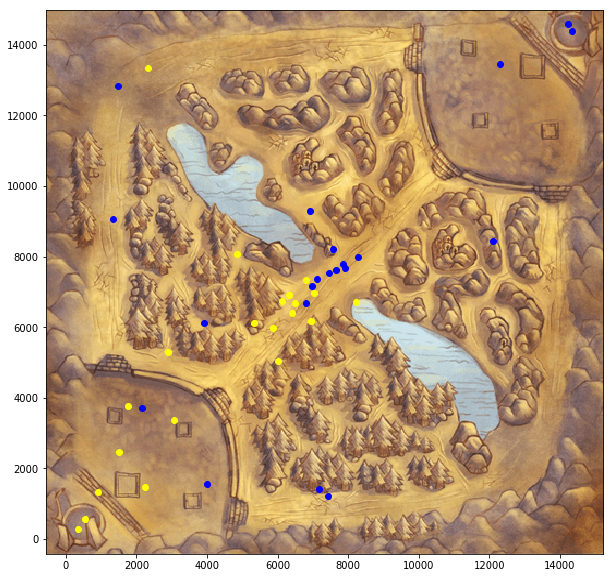

In [212]:
#game 2 plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(g2player8_x, g2player8_y, color = 'blue')
ax.scatter(g2player1_x,g2player1_y, color ='yellow')

In [203]:
#Game 3
g3player1_x = []
g3player1_y = []
g3player9_x = []
g3player9_y = []
for counter in range(len(game3[0]['frames'])-1):
    g3player9_x.append(game3[0]['frames'][counter]['participantFrames']['9']['position']['x'])
    g3player9_y.append(game3[0]['frames'][counter]['participantFrames']['9']['position']['y'])
    g3player1_x.append(game3[0]['frames'][counter]['participantFrames']['1']['position']['x'])
    g3player1_y.append(game3[0]['frames'][counter]['participantFrames']['1']['position']['y'])

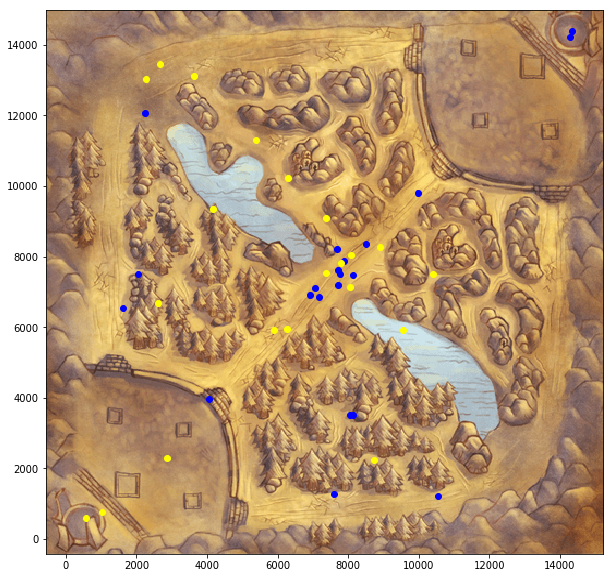

In [206]:
#game 3 plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(g3player9_x, g3player9_y, color = 'blue')
ax.scatter(g3player1_x,g3player1_y, color ='yellow')

In [189]:
#Game 4
g4player4_x = []
g4player4_y = []
g4player10_x = []
g4player10_y = []
for counter in range(len(game4[0]['frames'])-1):
    g4player10_x.append(game4[0]['frames'][counter]['participantFrames']['7']['position']['x'])
    g4player10_y.append(game4[0]['frames'][counter]['participantFrames']['7']['position']['y'])
    g4player4_x.append(game4[0]['frames'][counter]['participantFrames']['3']['position']['x'])
    g4player4_y.append(game4[0]['frames'][counter]['participantFrames']['3']['position']['y'])

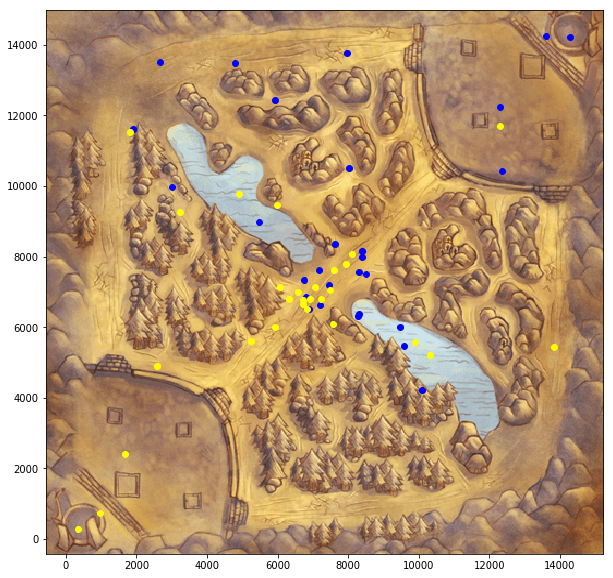

In [190]:
#game 4 plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(g4player10_x, g4player10_y, color = 'blue')
ax.scatter(g4player4_x,g4player4_y, color ='yellow')

In [25]:
#Game 5
g5player1_x = []
g5player1_y = []
g5player2_x = []
g5player2_y = []
g5player3_x = []
g5player3_y = []
g5player4_x = []
g5player4_y = []
g5player5_x = []
g5player5_y = []
g5player10_x = []
g5player10_y = []
for counter in range(len(game5[0]['frames'])-1):
    g5player10_x.append(game5[0]['frames'][counter]['participantFrames']['10']['position']['x'])
    g5player10_y.append(game5[0]['frames'][counter]['participantFrames']['10']['position']['y'])
    g5player1_x.append(game5[0]['frames'][counter]['participantFrames']['1']['position']['x'])
    g5player1_y.append(game5[0]['frames'][counter]['participantFrames']['1']['position']['y'])
    g5player2_x.append(game5[0]['frames'][counter]['participantFrames']['2']['position']['x'])
    g5player2_y.append(game5[0]['frames'][counter]['participantFrames']['2']['position']['y'])
    g5player3_x.append(game5[0]['frames'][counter]['participantFrames']['3']['position']['x'])
    g5player3_y.append(game5[0]['frames'][counter]['participantFrames']['3']['position']['y'])
    g5player4_x.append(game5[0]['frames'][counter]['participantFrames']['4']['position']['x'])
    g5player4_y.append(game5[0]['frames'][counter]['participantFrames']['4']['position']['y'])
    g5player5_x.append(game5[0]['frames'][counter]['participantFrames']['5']['position']['x'])
    g5player5_y.append(game5[0]['frames'][counter]['participantFrames']['5']['position']['y'])
    
    
    
    
    
    
    

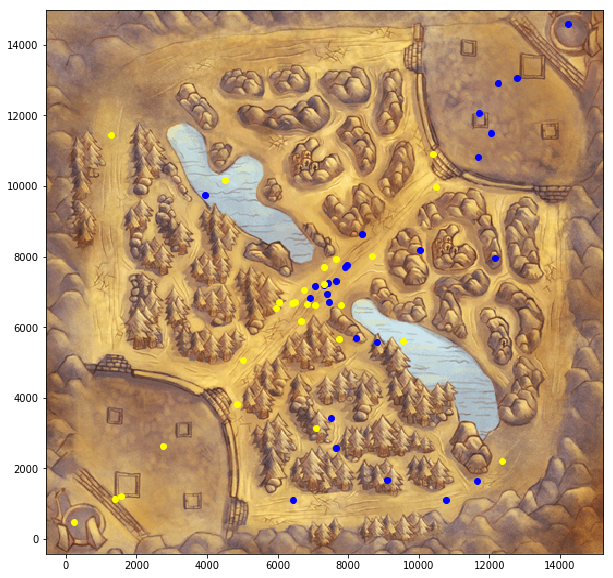

In [26]:
#Game 5 Plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(g5player10_x, g5player10_y, color = 'blue')
ax.scatter(g5player4_x,g5player4_y, color ='yellow')

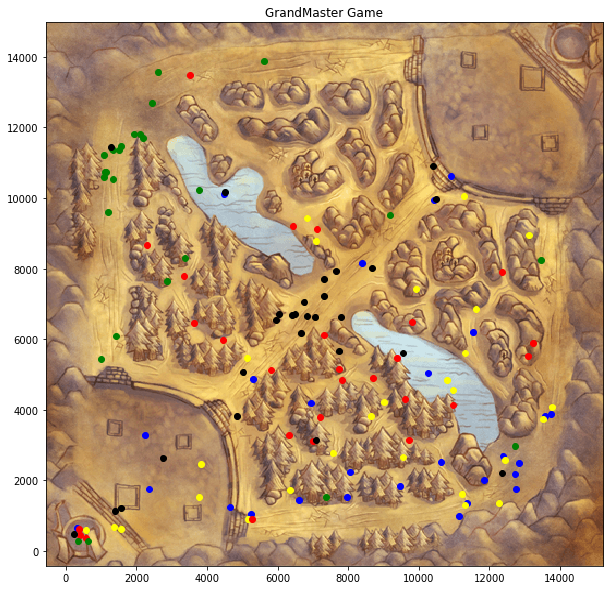

In [28]:
#my game plot team
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(g5player5_x, g5player5_y, color = 'blue')
ax.set_title('GrandMaster Game')
ax.scatter(g5player1_x,g5player1_y, color ='yellow')
ax.scatter(g5player2_x,g5player2_y, color ='red')
ax.scatter(g5player3_x,g5player3_y, color ='green')
ax.scatter(g5player4_x,g5player4_y, color ='black')

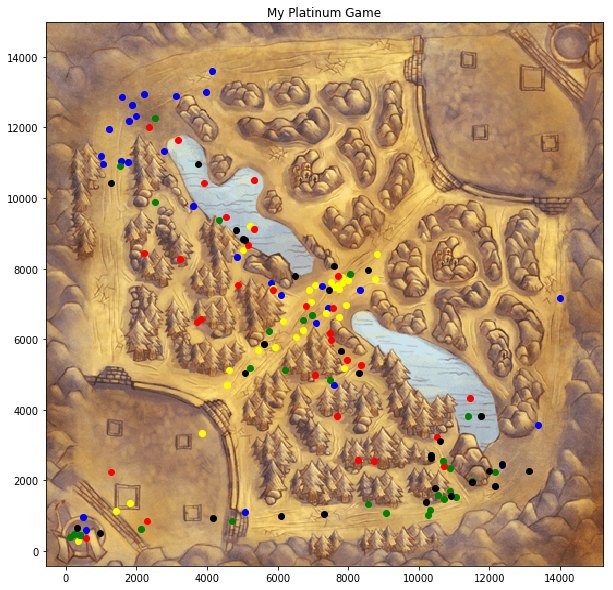

In [21]:
# GrandMaster team plot
img = plt.imread("SR_Map.png")
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-570, 15220, -420, 14980])
ax.scatter(mgplayer5_x, mgplayer5_y, color = 'blue')
ax.set_title('My Platinum Game')
ax.scatter(mgplayer1_x,mgplayer1_y, color ='yellow')
ax.scatter(mgplayer2_x,mgplayer2_y, color ='red')
ax.scatter(mgplayer3_x,mgplayer3_y, color ='green')
ax.scatter(mgplayer4_x,mgplayer4_y, color ='black')